In [48]:
import numpy as np
import matplotlib.pyplot as plt

Updated Drag Polar

In [49]:
S_ref = 312 #ft^3
k = 1.4 
rho = 1.969 * 10**-3
T = 490.1
R = 53.35
v = 123.171
visc = 3.575 * 10**-7

a = np.sqrt(k * R * T)
M = v / a 


In [50]:
def getFF(xc_max, f, lam, FF_type):
    #FF_type = 1 for wings, tails, struts and pylons
    #FF_type = 2 for fuselage and canopy, f < 6
    #FF_type = 3 for fuselage and canopy, f > 6
    #FF_type = 4 for nacelles
    if(FF_type == 1):
        FF  = (1 + 0.6 / xc_max * f + 100 * f**4) * (1.34 * M**0.18 * np.cos(lam)**0.28)
    elif(FF_type == 2):
        FF = 0.9  + 5 / f** 1.5 + f/400
    elif(FF_type == 3):
        FF = 1 + 60/ f**3 + f /400
    else:
        FF = 1 + 0.35 / f
    return FF

def getCf(lc, comp_type):
    #comp_type = 1 for fuselage
    #comp_type = 2 for everything else
    if comp_type == 1:
        lam_rat = 0.25
    else: 
        lam_rat = 0.5

    Re = rho * v * lc / visc

    Cf_lam = 1.328 / np.sqrt(Re)
    Cf_turb = 0.455 / (np.log10(Re)**2.58 * (1 + 0.144 * M ** 2)** 0.65)

    return (Cf_lam * lam_rat + Cf_turb * (1 - lam_rat))

def getCompCD0(Cf, FF, Q, S_wet):
    return (Cf * FF * Q * S_wet / S_ref)

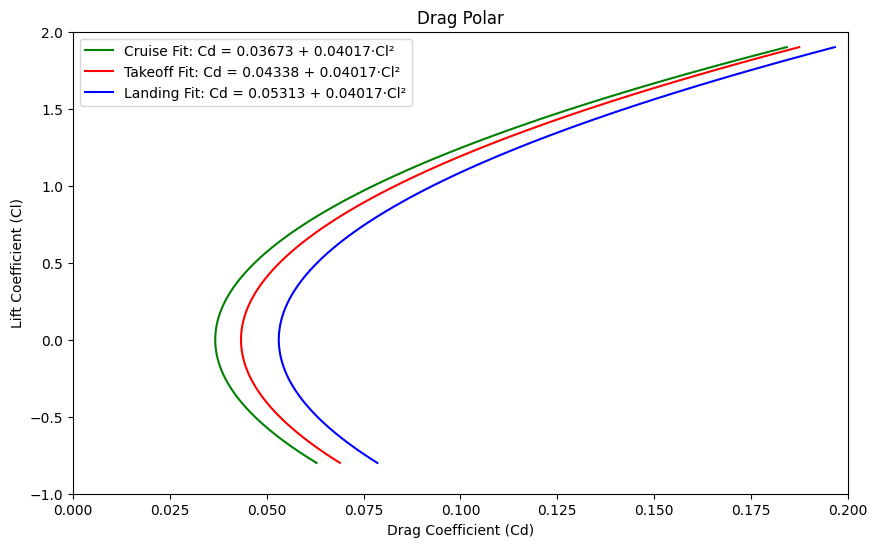

In [56]:

# Component A: Fuselage
Swet_A = 375.89
Q_A = 1.0
l_A = 30.0
f_A = 4.832 #from VSP
maxcamb_loc_A = 0
lambda_A = 0
FF_A = getFF(0, f_A , 0, 2)
Cf_A = getCf(l_A, 1)

Cd0_A = getCompCD0(Cf_A, FF_A, Q_A, Swet_A)



#Component B: Main Wing (NACA 23018)
Swet_B = 538.5
Q_B = 1.0
l_B = 6.22
f_B = 0.18
maxcamb_loc_B = 0.15
lambda_B = np.arctan(2.1 / 13.0)
FF_B = getFF(maxcamb_loc_B, f_B , lambda_B, 1)
Cf_b = getCf(l_B, 2)

Cd0_B = getCompCD0(Cf_b, FF_B, Q_B, Swet_B)


#Component C: Canard (NACA 0012)
Swet_C = 93.98
Q_C = 1.0
l_C = 3
f_C = 0.12  
maxcamb_loc_C = 0.3
lambda_C = 0
FF_C = getFF(maxcamb_loc_C, f_C , lambda_C, 1)
Cf_C = getCf(l_C, 2)

Cd0_C = getCompCD0(Cf_C, FF_C, Q_C, Swet_C)


#Component D: Canopy
Swet_D = 57.03
Q_D = 1.0
l_D = 12.0
f_D = 2.635 #from VSP
maxcamb_loc_D = 0
lambda_D = 0
FF_D = getFF(0, f_D , 0, 2)
Cf_D = getCf(l_D, 1)

Cd0_D = getCompCD0(Cf_A, FF_A, Q_A, Swet_A)



#Component E: Booms
Swet_E = 79.91
Q_E = 1.0
l_E = 18.0
d_E = 1.0
f_E = l_E / d_E
maxcamb_loc_E = 0
lambda_E = 0
FF_E = getFF(0, f_E ,0, 3)
Cf_E = getCf(l_E, 2)

Cd0_E = getCompCD0(Cf_E, FF_E, Q_E, Swet_E)

#Component F: Main Winglet (NACA 0012)
Swet_F = 46.39
Q_F = 1.0
l_F = 3.16
f_F = 0.12
maxcamb_loc_F = 0.2
lambda_F = np.arctan(3.35/1.63)
FF_F = getFF(maxcamb_loc_F, f_F , lambda_F, 1)
Cf_F = getCf(l_F, 2)

Cd0_F = getCompCD0(Cf_F, FF_F, Q_F, Swet_F)


#Component G: Canard Winglet (NACA 0012)
Swet_G = 8.17
Q_G = 1.0
l_G = 2.07
f_G = 0.12
maxcamb_loc_G = 0.2
lambda_G = 0
FF_G = getFF(maxcamb_loc_G, f_G , lambda_G, 1)
Cf_G  = getCf(l_G, 2)

Cd0_G = getCompCD0(Cf_G, FF_G, Q_G, Swet_G)


#Component H: Electric Nacelles
Swet_H = [10.04, 10.14, 11.17, 12.72, 10.82]
Q_H = 1.0
l_H = 5.0
d_H = 2/3
f_H = l_H / d_H
maxcamb_loc_G = 0
lambda_H = 0
FF_H = getFF(0, f_H , 0, 4)
Cf_H  = getCf(l_H, 2)

Cd0_H = np.zeros(5)

for i in range(5):
    Cd0_H[i] = getCompCD0(Cf_H, FF_H, Q_H, Swet_H[i])


#Component I: Horizontal Stabilizer
Swet_I = 130.64
Q_I = 1.07
l_I = 4
f_I = 0.1  
maxcamb_loc_I = 0.2
lambda_I = 0
FF_I = getFF(maxcamb_loc_I, f_I , lambda_I, 1)
Cf_I = getCf(l_I, 2)

Cd0_I = getCompCD0(Cf_I, FF_I, Q_I, Swet_I)

#Component J: Vertical Stabilizers
Sref_low = (5 + 28/9) / 2 * 8/3
Sref_high = (5 + 2.5) / 2 * 20/3
lam_low = 28/9 / 5
lam_high = 2.5 / 5
l_J_low = 2 / 3 * 5 * (1 + lam_low + lam_low**2) / (1 + lam_low)
l_J_high = 2 / 3 * 5 * (1 + lam_high + lam_high**2) / (1 + lam_high)

Swet_J = 130.36
Swet_J_low = Swet_I * Sref_low / (Sref_low + Sref_high)
Swet_J_high = Swet_I * Sref_high / (Sref_high + Sref_high)

Q_J = 1.07
f_J = 0.12  
maxcamb_loc_J = 0.2

lambda_J_low = np.arctan(2.67/1.17)
lambda_J_high = np.arctan(6.67/3.38)

FF_J_low = getFF(maxcamb_loc_J, f_J , lambda_J_low, 1)
FF_J_high = getFF(maxcamb_loc_J, f_J , lambda_J_high, 1)

Cf_J_low = getCf(l_J_low, 2)
Cf_J_high = getCf(l_J_high, 2)

Cd0_J = getCompCD0(Cf_J_low, FF_J_low, Q_J, Swet_J_low) + getCompCD0(Cf_J_high, FF_J_high, Q_J, Swet_J_high)


# Miscellaneous Form Drag

Dq_feathered_electric = 0.1 * 0.3393 * np.pi / 4 * (10/3)**2
Dq_feathered_gas = 0.1 * 0.3393 * np.pi / 4 * (9)**2
Dq_stopped_electric = 0.8 * 0.3393 * np.pi / 4 * (10/3)**2
Dq_stopped_gas = 0.8 * 0.3393 * np.pi / 4 * (9)**2

Cd0_fe = Dq_feathered_electric / S_ref
Cd0_fg = Dq_feathered_gas / S_ref
Cd0_se = Dq_stopped_electric / S_ref
Cd0_sg = Dq_stopped_gas / S_ref

A_f = 2585.4968 / 144
Dq_lg = 0.25 * A_f 

Cd0_lg = Dq_lg / S_ref


# Sum all Cd0 contributions (including all 5 nacelles)
Total_Cd0 = (
    Cd0_A + Cd0_B + Cd0_C + Cd0_D + Cd0_E + 
    Cd0_F + Cd0_G + np.sum(Cd0_H) + Cd0_I + Cd0_J + Cd0_lg
)

#Leakage / Protuberance Drag

Cd0_LP = 0.07 * Total_Cd0
Total_Cd0 = Total_Cd0 + Cd0_LP


#Trimmed Drag

c1_4 = 17.9
l_fus = 30
w_fus = 60
quart_chord_rat = c1_4 / l_fus

temp = (.6 - quart_chord_rat) / (quart_chord_rat - .5)
K_f = (temp * .688 + .888) / (1 + temp)



#======================================================

Cl_landing = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
Cd_landing = [0.01674, 0.01791, 0.01983, 0.02251, 0.02595, 0.03018, 0.03519, 0.041, 0.04761, 0.05505, 0.06331, 0.0724, 0.08235, 0.09314, 0.10481, 0.11734, 0.13077, 0.14508, 0.1603]


# Given data (Cl_takeoff and Cd)
Cl_takeoff = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
Cd_takeoff = np.array([0.00699, 0.00798, 0.00976, 0.01232, 0.01568, 0.01985, 0.02483, 0.03063, 0.03726, 0.04473, 0.05304, 0.0622, 0.07223, 0.08312, 0.09488, 0.10751, 0.12103, 0.13544, 0.15075])

# Cruise data
Cl_cruise = np.array([0.0386, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])
Cd_cruise = np.array([0.00034, 0.00065, 0.0018, 0.00376, 0.00653, 0.01013, 0.01454, 0.01978, 0.02585, 0.03275, 0.04049, 0.04906, 0.05847, 0.06872, 0.07981, 0.09174, 0.1045, 0.1181, 0.13252, 0.14776])

# Compute sums for least squares
n = len(Cl_takeoff)
sum_Cl2 = sum(cl**2 for cl in Cl_takeoff)
sum_Cl4 = sum(cl**4 for cl in Cl_takeoff)
sum_Cd = sum(Cd_takeoff)
sum_Cl2Cd = sum(Cl_takeoff[i]**2 * Cd_takeoff[i] for i in range(n))
denominator = n * sum_Cl4 - sum_Cl2**2
Cd_takeoff = .00699
K_takeoff = (n * sum_Cl2Cd - sum_Cl2 * sum_Cd) / denominator

# Compute sums for least squares
n = len(Cl_landing)
sum_Cl2 = sum(cl**2 for cl in Cl_landing)
sum_Cl4 = sum(cl**4 for cl in Cl_landing)
sum_Cd = sum(Cd_landing)
sum_Cl2Cd = sum(Cl_landing[i]**2 * Cd_landing[i] for i in range(n))
denominator = n * sum_Cl4 - sum_Cl2**2
Cd_landing = .01674
K_landing = (n * sum_Cl2Cd - sum_Cl2 * sum_Cd) / denominator

# Compute sums for least squares
n = len(Cl_cruise)
sum_Cl2 = sum(cl**2 for cl in Cl_cruise)
sum_Cl4 = sum(cl**4 for cl in Cl_cruise)
sum_Cd = sum(Cd_cruise)
sum_Cl2Cd = sum(Cl_cruise[i]**2 * Cd_cruise[i] for i in range(n))
denominator = n * sum_Cl4 - sum_Cl2**2
Cd_cruise = .00034
K_cruise = (n * sum_Cl2Cd - sum_Cl2 * sum_Cd) / denominator

Cdmin_landing = Cd_landing + Total_Cd0
Cdmin_takeoff = Cd_takeoff + Total_Cd0
Cdmin_cruise = Cd_cruise + Total_Cd0

K = (K_cruise + K_takeoff + K_landing) / 3
# Generate fitted curves
Cl_fit = np.linspace(-0.8, 1.9, 100)
Cd_fit_landing = Cdmin_landing + K_landing * Cl_fit**2
Cd_fit_takeoff = Cdmin_takeoff + K_takeoff * Cl_fit**2
Cd_fit_cruise = Cdmin_cruise + K_cruise * Cl_fit**2

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(Cd_fit_cruise, Cl_fit, 'g-', label=f'Cruise Fit: Cd = {Cdmin_cruise:.5f} + {K:.5f}·Cl²')
plt.plot(Cd_fit_takeoff, Cl_fit , 'r-', label=f'Takeoff Fit: Cd = {Cdmin_takeoff:.5f} + {K:.5f}·Cl²')
plt.plot(Cd_fit_landing, Cl_fit, 'b-', label=f'Landing Fit: Cd = {Cdmin_landing:.5f} + {K:.5f}·Cl²')

plt.xlabel('Drag Coefficient (Cd)')
plt.ylabel('Lift Coefficient (Cl)')
plt.title('Drag Polar')
plt.legend()
plt.grid(False)
plt.xlim(0, 0.2)  # Adjust based on your data range
plt.ylim(-1, 2.0)
plt.show()


In [57]:
# Create a comprehensive table of component data
components_data = [
    ["A: Fuselage", Swet_A, FF_A, l_A, f_A, Cf_A, Q_A, Cd0_A],
    ["B: Main Wing", Swet_B, FF_B, l_B, f_B, Cf_b, Q_B, Cd0_B],
    ["C: Canard", Swet_C, FF_C, l_C, f_C, Cf_C, Q_C, Cd0_C],
    ["D: Canopy", Swet_D, FF_D, l_D, f_D, Cf_D, Q_D, Cd0_D],
    ["E: Booms", Swet_E, FF_E, l_E, f_E, Cf_E, Q_E, Cd0_E],
    ["F: Main Winglet", Swet_F, FF_F, l_F, f_F, Cf_F, Q_F, Cd0_F],
    ["G: Canard Winglet", Swet_G, FF_G, l_G, f_G, Cf_G, Q_G, Cd0_G],
    *[["H: Nacelle "+str(i+1), Swet_H[i], FF_H, l_H, f_H, Cf_H, Q_H, Cd0_H[i]] for i in range(5)],
    ["I: Horizontal Stabilizer", Swet_I, FF_I, l_I, f_I, Cf_I, Q_I, Cd0_I],
    ["J: Vertical Stabilizers", Swet_J, (FF_J_low + FF_J_high)/2, (l_J_low + l_J_high)/2, f_J, (Cf_J_low + Cf_J_high)/2, Q_J, Cd0_J],
    ["Leakage/Protuberance", "-", "-", "-", "-", "-", "-", Cd0_LP],
    ["Landing Gear", "-", "-", "-", "-", "-", "-", Cd0_lg],
    ["TOTAL", sum([Swet_A, Swet_B, Swet_C, Swet_D, Swet_E, Swet_F, Swet_G, sum(Swet_H), Swet_I, Swet_J]), 
     "-", "-", "-", "-", "-", Total_Cd0]
]

# Print comprehensive component data table
print("="*120)
print("AERODYNAMIC DRAG BREAKDOWN WITH COMPONENT PARAMETERS")
print("="*120)
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
    "Component", "S_wet", "FF", "L_ref", "f", "Cf", "Q", "Cd0"))
print("-"*90)

def format_value(value, fmt):
    if isinstance(value, str):
        return value
    try:
        return fmt.format(value)
    except:
        return str(value)

for item in components_data:
    formatted_values = [
        item[0],
        format_value(item[1], "{:.2f}"),
        format_value(item[2], "{:.4f}"),
        format_value(item[3], "{:.2f}"),
        format_value(item[4], "{:.3f}"),
        format_value(item[5], "{:.6f}"),
        format_value(item[6], "{:.2f}"),
        format_value(item[7], "{:.6f}")
    ]
    print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(*formatted_values))
print("="*120)

# Print engine failure scenarios
print("\nENGINE FAILURE SCENARIOS DRAG INCREASE")
print("-"*45)
for scenario in failure_scenarios:
    print("{:<30} {:<10.6f}".format(scenario[0], scenario[1]))

# Print engine failure scenarios
failure_scenarios = [
    ["1 Electric engine feathered", Cd0_fe],
    ["1 Gas engine feathered", Cd0_fg],
    ["1 Electric engine stopped", Cd0_se],
    ["1 Gas engine stopped", Cd0_sg]
]

print("\nENGINE FAILURE SCENARIOS DRAG INCREASE")
print("-"*45)
for scenario in failure_scenarios:
    print("{:<30} {:<10.6f}".format(scenario[0], scenario[1]))
# Print engine failure scenarios
failure_scenarios = [
    ["1 Electric engine feathered", Cd0_fe],
    ["1 Gas engine feathered", Cd0_fg],
    ["1 Electric engine stopped", Cd0_se],
    ["1 Gas engine stopped", Cd0_sg]
]

print("\n\nZERO-LIFT DRAG INCREASE FOR ENGINE FAILURE SCENARIOS")
print("="*70)
print("{:<30} {:<10}".format("Scenario", "ΔCd"))  # Header
print("-"*42)
for scenario in failure_scenarios:
    print("{:<30} {:<10.6f}".format(scenario[0], scenario[1]))
print("="*70)



AERODYNAMIC DRAG BREAKDOWN WITH COMPONENT PARAMETERS
Component            S_wet      FF         L_ref      f          Cf         Q          Cd0       
------------------------------------------------------------------------------------------
A: Fuselage          375.89     1.3828     30.00      4.832      0.002015   1.00       0.003356  
B: Main Wing         538.50     2.2510     6.22       0.180      0.001990   1.00       0.007732  
C: Canard            93.98      1.5606     3.00       0.120      0.002357   1.00       0.001108  
D: Canopy            57.03      2.0755     12.00      2.635      0.002359   1.00       0.003356  
E: Booms             79.91      1.0553     18.00      18.000     0.001591   1.00       0.000430  
F: Main Winglet      46.39      1.3560     3.16       0.120      0.002328   1.00       0.000469  
G: Canard Winglet    8.17       1.7092     2.07       0.120      0.002582   1.00       0.000116  
H: Nacelle 1         10.04      1.0467     5.00       7.500      0.00209